In [1]:
import pandas as pd
import numpy as np

In [5]:
customer=pd.read_csv('Customer.csv')
category=pd.read_csv('prod_cat_info.csv')
transaction=pd.read_csv('Transactions.csv')

In [7]:
customer.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [8]:
category.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [9]:
transaction.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


In [11]:
customer_final=pd.merge(customer,transaction,left_on='customer_Id', right_on='cust_id')

In [17]:
category.rename(columns={'prod_sub_cat_code':'prod_subcat_code'},inplace=True)

In [20]:
customer_final=customer_final.merge(category,on='prod_subcat_code')

In [21]:
customer_final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,5,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,5,Books,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,5,Books,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,5,Books,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,5,Books,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57161,272141,02-12-1992,F,10.0,79059585885,272141,25-10-2012,5,3,2,1354,284.340,2992.340,e-Shop,3,Electronics,Computers
57162,269719,04-12-1992,F,8.0,70553332101,269719,23-11-2013,5,3,2,623,130.830,1376.830,Flagship store,3,Electronics,Computers
57163,275051,04-12-1992,M,5.0,77933614379,275051,18-05-2013,5,3,5,1095,574.875,6049.875,e-Shop,3,Electronics,Computers
57164,270695,05-12-1992,F,6.0,2300510157,270695,20-11-2012,5,3,3,906,285.390,3003.390,TeleShop,3,Electronics,Computers


In [37]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57166 entries, 0 to 57165
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_Id       57166 non-null  int64         
 1   DOB               57166 non-null  datetime64[ns]
 2   Gender            57144 non-null  object        
 3   city_code         57151 non-null  float64       
 4   transaction_id    57166 non-null  int64         
 5   cust_id           57166 non-null  int64         
 6   tran_date         57166 non-null  datetime64[ns]
 7   prod_subcat_code  57166 non-null  int64         
 8   prod_cat_code_x   57166 non-null  int64         
 9   Qty               57166 non-null  int64         
 10  Rate              57166 non-null  int64         
 11  Tax               57166 non-null  float64       
 12  total_amt         57166 non-null  float64       
 13  Store_type        57166 non-null  object        
 14  prod_cat_code_y   5716

In [32]:
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'])


C:\Users\ritik\AppData\Local\Temp\ipykernel_17072\3744048138.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customer_final['DOB'] = pd.to_datetime(customer_final['DOB'])


In [34]:
customer_final['tran_date'] = pd.to_datetime(customer_final['tran_date'])


C:\Users\ritik\AppData\Local\Temp\ipykernel_17072\3705324645.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customer_final['tran_date'] = pd.to_datetime(customer_final['tran_date'])


In [42]:
customer_final.isna().sum()

customer_Id         0
DOB                 0
Gender              0
city_code           0
transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code_x     0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat_code_y     0
prod_cat            0
prod_subcat         0
dtype: int64

In [45]:
customer_final=customer_final.dropna()

In [54]:
customer_final.duplicated().sum()

0

In [53]:
customer_final =customer_final.drop_duplicates()

In [55]:
customer_final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,5,Books,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,5,Books,Fiction
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,5,Books,Fiction
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,5,Books,Fiction
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,5,Books,Fiction
5,274630,1970-01-02,M,4.0,78357345891,274630,2012-11-04,7,5,1,646,67.830,713.830,TeleShop,5,Books,Fiction
6,273541,1970-01-02,M,4.0,23916816961,273541,2013-09-02,7,5,4,410,172.200,1812.200,e-Shop,5,Books,Fiction
7,269008,1970-02-13,F,6.0,35560569829,269008,2013-09-03,7,5,1,1441,151.305,1592.305,e-Shop,5,Books,Fiction
8,269008,1970-02-13,F,6.0,94033312891,269008,2012-04-26,7,5,5,746,391.650,4121.650,MBR,5,Books,Fiction
10,272883,1970-02-19,M,5.0,35308880657,272883,2013-01-12,7,5,-4,-1161,487.620,-5131.620,TeleShop,5,Books,Fiction


In [57]:
customer_final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_subcat
57156,273899,1992-07-10,F,5.0,28966519600,273899,2011-12-31,5,3,1,308,32.340,340.340,e-Shop,3,Electronics,Computers
57157,269241,1992-09-10,F,4.0,99372261440,269241,2013-06-10,5,3,3,511,160.965,1693.965,e-Shop,3,Electronics,Computers
57158,270484,1992-10-14,F,1.0,49410470654,270484,2013-11-13,5,3,2,825,173.250,1823.250,e-Shop,3,Electronics,Computers
57159,266825,1992-11-21,F,8.0,8969181661,266825,2013-12-27,5,3,4,109,45.780,481.780,MBR,3,Electronics,Computers
57160,267094,1992-11-24,M,9.0,12905992307,267094,2014-01-26,5,3,1,1449,152.145,1601.145,e-Shop,3,Electronics,Computers
57161,272141,1992-02-12,F,10.0,79059585885,272141,2012-10-25,5,3,2,1354,284.340,2992.340,e-Shop,3,Electronics,Computers
57162,269719,1992-04-12,F,8.0,70553332101,269719,2013-11-23,5,3,2,623,130.830,1376.830,Flagship store,3,Electronics,Computers
57163,275051,1992-04-12,M,5.0,77933614379,275051,2013-05-18,5,3,5,1095,574.875,6049.875,e-Shop,3,Electronics,Computers
57164,270695,1992-05-12,F,6.0,2300510157,270695,2012-11-20,5,3,3,906,285.390,3003.390,TeleShop,3,Electronics,Computers
57165,270476,1992-12-25,F,3.0,85475160771,270476,2011-09-08,5,3,5,1354,710.850,7480.850,Flagship store,3,Electronics,Computers


In [67]:
summary=customer_final.describe()
summary.drop(['count','mean','std'],axis=0,inplace=True)

In [73]:
summary

,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,prod_cat_code_y
min,266783.0,1.0,3.268991e+06,266783.0,1.0,1.0,-5.0,-1499.0,7.350,-8270.925,1.0
25%,268934.0,3.0,2.525115e+10,268934.0,3.0,2.0,1.0,312.0,98.490,765.765,2.0
50%,270983.0,5.0,5.017763e+10,270983.0,4.0,3.0,3.0,709.0,199.395,1761.370,3.0
75%,273099.0,8.0,7.550590e+10,273099.0,10.0,5.0,4.0,1109.0,364.980,3553.680,5.0
max,275265.0,10.0,9.998755e+10,275265.0,12.0,6.0,5.0,1500.0,787.500,8287.500,6.0


In [79]:
customer_final.loc[:,customer_final.dtypes == 'object'].describe()

,Gender,Store_type,prod_cat,prod_subcat
count,57095,57095,57095,57095
unique,2,4,6,18
top,M,e-Shop,Books,Women
freq,29164,23057,12163,10008


In [80]:
import matplotlib.pyplot as plt

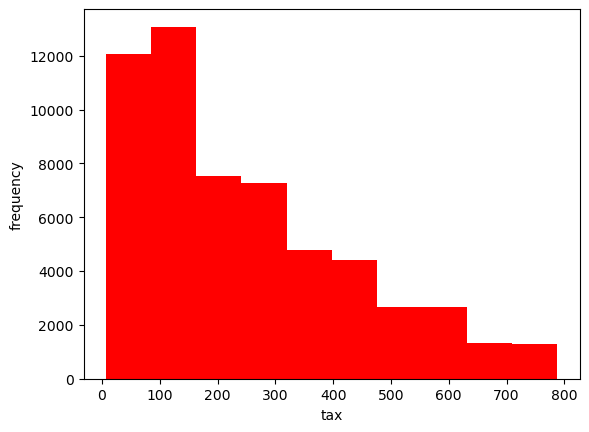

In [81]:
Tax = customer_final['Tax']
plt.hist(Tax,color=['red'])
plt.xlabel('tax')
plt.ylabel('frequency')
plt.show()

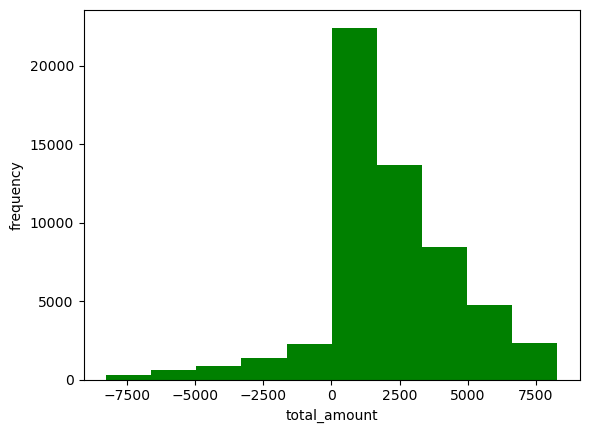

In [89]:
total_amount=customer_final["total_amt"]
plt.hist(total_amount,color=['green'])
plt.xlabel('total_amount')
plt.ylabel('frequency')
plt.show()

In [110]:
customer_final[customer_final['total_amt'] < 0]



,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_subcat
10,272883,1970-02-19,M,5.0,35308880657,272883,2013-01-12,7,5,-4,-1161,487.620,-5131.620,TeleShop,5,Books,Fiction
15,267379,1970-03-21,F,2.0,18331140958,267379,2014-04-01,7,5,-1,-842,88.410,-930.410,TeleShop,5,Books,Fiction
22,274849,1970-09-06,M,4.0,91064381796,274849,2013-11-12,7,5,-3,-735,231.525,-2436.525,TeleShop,5,Books,Fiction
37,269235,1970-10-22,F,4.0,85861933577,269235,2012-10-10,7,5,-1,-234,24.570,-258.570,e-Shop,5,Books,Fiction
38,269235,1970-10-22,F,4.0,85861933577,269235,2012-06-10,7,5,-1,-234,24.570,-258.570,e-Shop,5,Books,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57122,272906,1991-10-17,M,2.0,73947129790,272906,2012-11-22,5,3,-5,-421,221.025,-2326.025,TeleShop,3,Electronics,Computers
57125,272655,1991-03-12,F,10.0,95361895943,272655,2012-08-16,5,3,-3,-523,164.745,-1733.745,e-Shop,3,Electronics,Computers
57143,267673,1992-05-19,F,5.0,17817598623,267673,2013-11-29,5,3,-2,-482,101.220,-1065.220,e-Shop,3,Electronics,Computers
57148,267793,1992-06-29,F,9.0,14909431266,267793,2012-12-28,5,3,-2,-1159,243.390,-2561.390,MBR,3,Electronics,Computers


<Axes: >

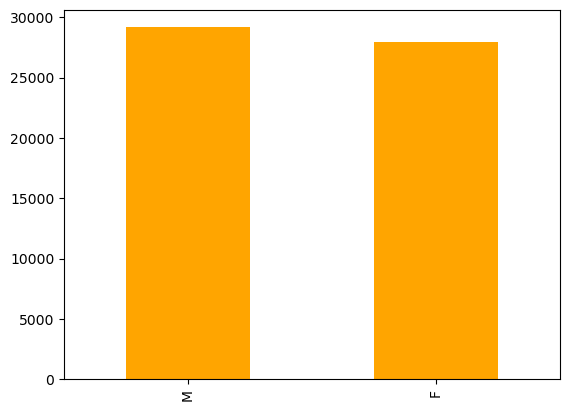

In [187]:
customer_final['Gender'].value_counts().plot(kind = 'bar',color='orange')

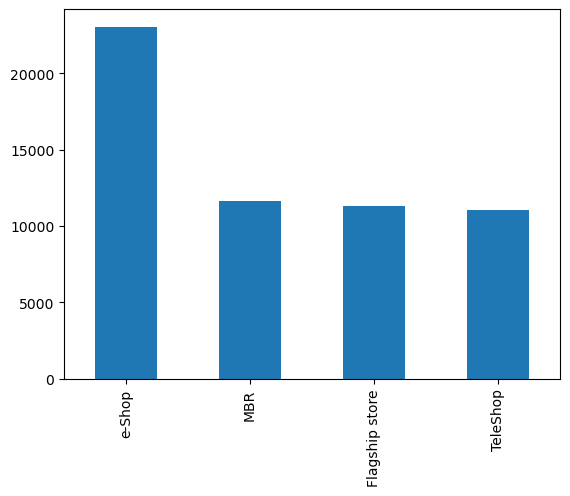

In [123]:
Store_type = customer_final['Store_type'].value_counts().plot(kind='bar')

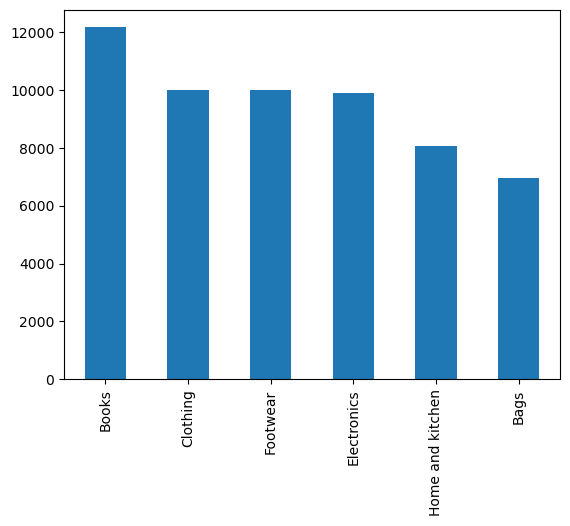

In [125]:
Store_type = customer_final['prod_cat'].value_counts().plot(kind='bar')

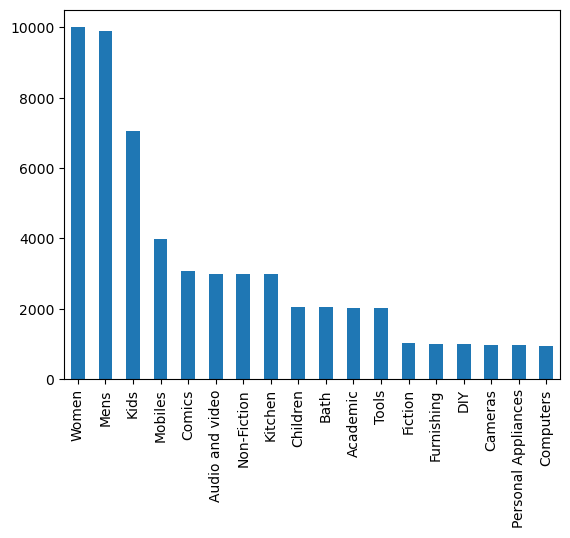

In [126]:
Store_type = customer_final['prod_subcat'].value_counts().plot(kind='bar')

In [127]:
customer_final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,5,Books,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,5,Books,Fiction
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,5,Books,Fiction
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,5,Books,Fiction
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,5,Books,Fiction


In [133]:
customer_final.sort_values(by="tran_date",ascending=False)


,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_subcat
53256,274897,1987-09-16,M,2.0,17146707816,274897,2014-12-02,12,5,3,622,195.93,2061.93,MBR,5,Books,Academic
36355,266794,1971-02-28,F,9.0,15403541663,266794,2014-12-02,3,2,2,322,67.62,711.62,e-Shop,2,Footwear,Women
9217,268100,1991-02-26,M,1.0,23525861068,268100,2014-12-02,1,2,3,1318,415.17,4369.17,TeleShop,4,Bags,Mens
52526,273322,1983-10-06,F,1.0,89214951500,273322,2014-12-02,12,6,1,1166,122.43,1288.43,TeleShop,5,Books,Academic
9216,268100,1991-02-26,M,1.0,23525861068,268100,2014-12-02,1,2,3,1318,415.17,4369.17,TeleShop,2,Footwear,Mens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37186,267309,1973-08-04,F,1.0,60041644943,267309,2011-01-02,3,2,1,392,41.16,433.16,Flagship store,2,Footwear,Women
37185,267309,1973-08-04,F,1.0,60041644943,267309,2011-01-02,3,2,1,392,41.16,433.16,Flagship store,1,Clothing,Kids
35710,275227,1989-09-23,M,4.0,28972634039,275227,2011-01-02,9,3,-1,-334,35.07,-369.07,MBR,3,Electronics,Cameras
32903,274459,1990-02-13,M,4.0,65685613041,274459,2011-01-02,4,3,-3,-968,304.92,-3208.92,TeleShop,4,Bags,Women


In [136]:
min_date=customer_final['tran_date'].min()
min_date

Timestamp('2011-01-02 00:00:00')

In [138]:
max_date= customer_final['tran_date'].max()
max_date

Timestamp('2014-12-02 00:00:00')

In [150]:
print("Time period of the available transaction data is from ", min_date, " to", max_date)

Time period of the available transaction data is from  2011-01-02 00:00:00  to 2014-12-02 00:00:00


In [169]:
qt_sold = customer_final.groupby(['prod_cat','Gender'])[['Qty']].size().reset_index()
qt_sold.rename(columns = {0:'qt_sold'},inplace = True)
qt_sold

,prod_cat,Gender,qt_sold
0,Bags,F,3361
1,Bags,M,3583
2,Books,F,5999
3,Books,M,6164
4,Clothing,F,4913
5,Clothing,M,5095
6,Electronics,F,4790
7,Electronics,M,5107
8,Footwear,F,4913
9,Footwear,M,5095


In [164]:
# Which store type sells the maximum products by value and by quantity

store_type_max = customer_final.sort_values(['Rate','Qty'],ascending=False).head(1)
store_type_max = store_type_max['Store_type']
store_type_max 

20172    e-Shop
Name: Store_type, dtype: object

In [170]:
# What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

customer_amount1=customer_final[(customer_final['Store_type']== 'Flagship store') &
                                ((customer_final['prod_cat']=='Electronics') |
                                (customer_final['prod_cat']=='Clothing'))]['total_amt'].sum()
customer_amount1

8531428.75

In [185]:
# What was the total amount earned from "Male" customers under the "Electronics" category?

customer_final[(customer_final['Gender'] == 'M') &
               (customer_final['prod_cat'] =='Electronics')][['total_amt']].sum()

total_amt    10946911
dtype: int64

In [171]:
# How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

positive_amt = customer_final[customer_final['total_amt'] > 0]

In [183]:
customer_final['total_amt']=customer_final['total_amt'].astype(int)

In [184]:
customer_final['total_amt'].dtypes

dtype('int32')

In [172]:
unique_trans = positive_amt.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()


In [173]:
unique_transaction = unique_trans.groupby('customer_Id')[['transaction_id']].count().sort_values(by='transaction_id',ascending=False)
unique_transaction

,transaction_id
customer_Id,
268076,19
269189,19
274854,19
275131,18
273417,18
...,...
271963,1
271777,1
267078,1


In [174]:
# For all customers aged between 25 - 35, find out: a. What was the total amount spent for “Electronics” and “Books” product categories?b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?
customer_final['current_year']=pd.to_datetime('today').year
customer_final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_subcat,current_year
0,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,5,Books,Fiction,2023
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,5,Books,Fiction,2023
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,5,Books,Fiction,2023
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,5,Books,Fiction,2023
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,5,Books,Fiction,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57161,272141,1992-02-12,F,10.0,79059585885,272141,2012-10-25,5,3,2,1354,284.340,2992.340,e-Shop,3,Electronics,Computers,2023
57162,269719,1992-04-12,F,8.0,70553332101,269719,2013-11-23,5,3,2,623,130.830,1376.830,Flagship store,3,Electronics,Computers,2023
57163,275051,1992-04-12,M,5.0,77933614379,275051,2013-05-18,5,3,5,1095,574.875,6049.875,e-Shop,3,Electronics,Computers,2023
57164,270695,1992-05-12,F,6.0,2300510157,270695,2012-11-20,5,3,3,906,285.390,3003.390,TeleShop,3,Electronics,Computers,2023


In [175]:
customer_final['DOB_Year'] = customer_final['DOB'].dt.year


In [176]:
customer_final['Age'] = customer_final['current_year'] - customer_final['DOB_Year']
customer_final


,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_subcat,current_year,DOB_Year,Age
0,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,5,Books,Fiction,2023,1970,53
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,5,Books,Fiction,2023,1970,53
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,5,Books,Fiction,2023,1970,53
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,5,Books,Fiction,2023,1970,53
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,5,Books,Fiction,2023,1970,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57161,272141,1992-02-12,F,10.0,79059585885,272141,2012-10-25,5,3,2,1354,284.340,2992.340,e-Shop,3,Electronics,Computers,2023,1992,31
57162,269719,1992-04-12,F,8.0,70553332101,269719,2013-11-23,5,3,2,623,130.830,1376.830,Flagship store,3,Electronics,Computers,2023,1992,31
57163,275051,1992-04-12,M,5.0,77933614379,275051,2013-05-18,5,3,5,1095,574.875,6049.875,e-Shop,3,Electronics,Computers,2023,1992,31
57164,270695,1992-05-12,F,6.0,2300510157,270695,2012-11-20,5,3,3,906,285.390,3003.390,TeleShop,3,Electronics,Computers,2023,1992,31


In [177]:
total_amt = customer_final[((customer_final['prod_cat'] == 'Electronics') |
               (customer_final['prod_cat'] == 'Books')) &
               (customer_final['Age'] >= 25) & (customer_final['Age'] <= 35)]

In [188]:
# What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?
age_of_customer = customer_final[(customer_final['Age'] >= 25) & (customer_final['Age'] <= 35)]['total_amt'].sum()
age_of_customer


26241333